In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets 
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
np.random.seed(0)

In [3]:
df = pd.read_csv('/content/sample_data/diabetes.csv')
print(df)
df.head() # To get first n rows from the dataset default value of n is 5 
M=len(df) 
M

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

768

In [4]:
X = df.iloc[:, 0:8].values
Y = df.iloc[:, 8].values

In [5]:
X[0:5]
#Y[0:5]


array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [6]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state = 0, train_size = .8)

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")

No. of training examples: 614
No. of testing examples: 154


In [7]:

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [9]:
#Lets create a matrix with single column of ones 
X_0 = np.ones((614, 1)) 
X_2 = np.ones((154,1))

In [10]:
# Using reshape function convert X 1D array to 2D array of dimension 100X1 
X_1 = X_train.reshape(614,8) 
X_3 = X_test.reshape(154,8)
X_1[:5] 
X_3[:5]

array([[-0.8354355 ,  2.45735903,  0.34674316,  1.39507401, -0.69965674,
         1.35224513,  2.78594417, -0.96569189],
       [-0.54480808, -0.43719633,  0.24436264,  0.58457246,  0.15216202,
         0.17619533, -0.1876381 , -0.88240283],
       [ 0.03644676, -1.41253563, -0.36992051, -1.28581572, -0.69965674,
         0.22677812, -0.22668514, -0.71582471],
       [ 0.32707418,  1.4190946 ,  0.14198211, -0.10123654,  0.79102609,
        -0.81016901,  0.36202408,  1.44969086],
       [-1.12606292, -0.3113461 , -0.21634972, -1.28581572, -0.69965674,
        -0.96191737,  0.58128822, -0.21609035]])

In [11]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column 
# This will be our final X matrix (feature matrix) 
X_train = np.hstack((X_0, X_1)) 
X_test = np.hstack((X_2, X_3))

In [48]:
theta = np.zeros(8) 
theta

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  m= X.shape[0]
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [20]:
# Lets compute the cost for theta values 
cost = compute_cost(X_train, Y_train, theta) 
print('The cost for given values of theta_0 =',cost) 

The cost for given values of theta_0 = 0.17996742671009772


In [49]:
def compute_cost_regularized(X, y, theta, lamda):

 m= X.shape[0]

predictions = X.dot(theta)
errors = np.subtract(predictions, y)
sqrErrors = np.square(errors)
sqrErrors = np.sum(sqrErrors)
reg_term = lamda * np.sum(np.square(theta))
J = 1 / (2 * m) * (sqrErrors + reg_term)
return J


def gradient_decsent(X_train, y_train, X_test, y_test, lr, n_epochs, lamda =None):
 
  train_losses = []
  test_losses = []
  train_cost_history = np.zeros(n_epochs)
  test_cost_history = np.zeros(n_epochs)
  m=X_train.shape[0]
  for i in range(n_epochs):
      predictions = X_train.dot(thetas)
      errors = np.subtract(predictions, y_train)
      sum_delta = (lr / m) * X_train.transpose().dot(errors);
      thetas = thetas - sum_delta;
      if lamda==None:
          train_loss = compute_cost(X_train, y_train, thetas)
          train_cost_history[i] = train_loss
      if lamda!=None:
        train_loss = compute_cost_regularized(X_train, y_train, thetas, lamda)
        train_cost_history[i] = train_loss
  test_loss = compute_cost(X_test, y_test, thetas)
  test_cost_history[i] = test_loss
  if i % 10 == 0:
        print('Epoch %d, Train Loss %f' % (i, float(train_loss)))
        print('Epoch %d, Test Loss %f' % (i, float(test_loss)))



return thetas, train_cost_history, test_cost_history

NameError: ignored

In [38]:
theta = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.] 
iterations = 100; 
alpha =0.01;

In [39]:
theta, cost_history_a, cost_history_a2 = gradient_descent(X_train, X_test, y_train, y_test, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history_a[-1],cost_history_a2[-1]) 

NameError: ignored

In [40]:
#Import LogisticRegression from sklearn.linear_model
#Make an instance classifier of the object LogisticRegression and give random_state =

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [41]:
Y_pred = classifier.predict(X_test)

In [42]:
Y_pred[0:9]


array([1, 0, 0, 1, 0, 0, 1, 1, 0])

In [43]:
#Using Confusion matrix we can get accuracy of our model.
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix


array([[98,  9],
       [18, 29]])

In [44]:
#Let's evaluate the model using model evaluation metrics such as accuracy, precision, a

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

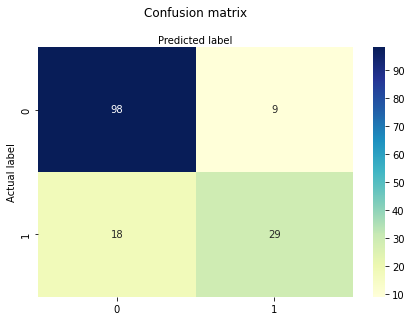

In [45]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matp
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, X, Y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


Accuracy: 76.555% (3.185%)


In [47]:
kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, X, Y, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


Accuracy: 76.818% (3.744%)
